In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
train = pd.read_csv("./botnet/UNSW_NB15_training.csv")
test = pd.read_csv("./botnet/UNSW_NB15_testing.csv")

In [4]:
train.shape, test.shape

((175341, 45), (82332, 45))

In [5]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [6]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [7]:
train['type'] = 'train'
test['type'] ='test'
data = pd.concat([train,test]).reset_index(drop=True)
data = data.drop(axis = 1, columns= ['id'])

In [8]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,type
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,0,0,0,1,1,0,Normal,0,train
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,2,0,0,0,1,6,0,Normal,0,train
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,3,0,0,0,2,6,0,Normal,0,train
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,3,1,1,0,2,1,0,Normal,0,train
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,40,0,0,0,2,39,0,Normal,0,train


In [9]:
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [10]:
pd.set_option('display.max_columns', None)
pd.DataFrame(data.isna().sum().to_dict(), index=[0])

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label', 'type'],
      dtype='object')

In [12]:
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

The class ratio for the original data: 0.6:1 (93000/164673)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


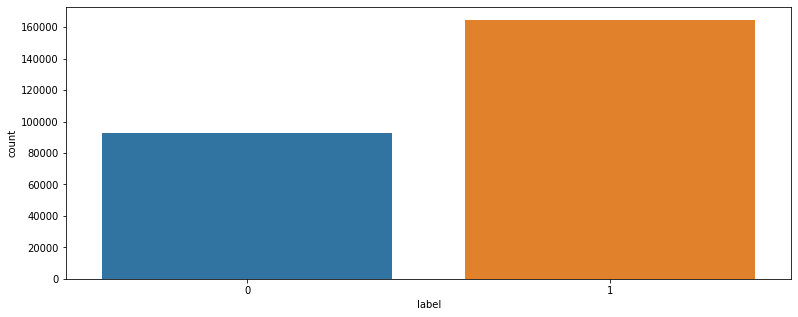

In [13]:
print('The class ratio for the original data:', data_ratio(data['label']))
plt.figure(figsize=(13,5))
sns.countplot(data['label'],label="Sum")
plt.show()

<AxesSubplot:>

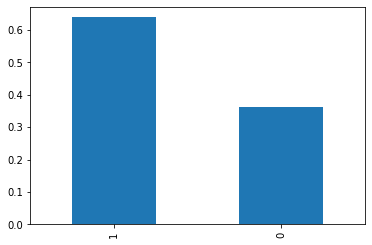

In [14]:
data.label.value_counts(normalize=True).plot.bar()

In [15]:
data.label.value_counts(), data.label.value_counts(normalize=True)

(1    164673
 0     93000
 Name: label, dtype: int64,
 1    0.639077
 0    0.360923
 Name: label, dtype: float64)

The class ratio for the original data: 1.1:1 (2677/2329)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


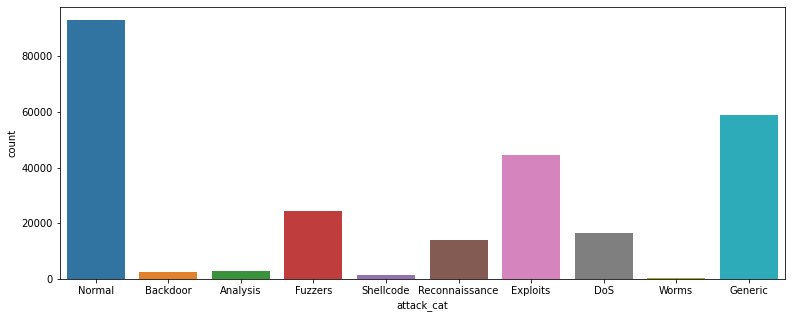

In [16]:
print('The class ratio for the original data:', data_ratio(data['attack_cat']))
plt.figure(figsize=(13,5))
sns.countplot(data['attack_cat'],label="Sum")
plt.show()

<AxesSubplot:>

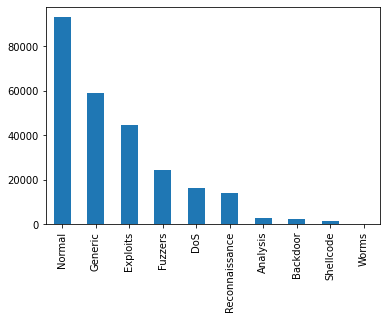

In [17]:
data.attack_cat.value_counts().plot.bar()

In [18]:
data.dtypes.value_counts()

int64      29
float64    11
object      5
dtype: int64

### Checking data types

In [19]:
cols_cat = data.select_dtypes('object').columns
cols_cat

Index(['proto', 'service', 'state', 'attack_cat', 'type'], dtype='object')

In [20]:
cols_numeric = data._get_numeric_data().columns
cols_numeric

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

<ul>
<li>categorical: state, service, proto </li>
<li>target = attack_cat, label </li>
<li>integer but categorial = is_sm_ips_ports, ct_state_ttl, is_ftp_login </li>
<li>integer = spkts, dpkts, sbytes, dbytes, sttl, dttl, sload, dload, sloss, dloss, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst </li>
<li>decimal = dur, rate, sinpkt, dinpkt, sjit, djit, tcprtt, synack, ackdat </li>
</ul>

### Plotting categorical data's value counts for exploratory analysis

proto 
 {'tcp': 123041, 'udp': 92701, 'unas': 15599, 'arp': 3846, 'ospf': 3271, 'sctp': 1474, 'any': 396, 'gre': 313, 'rsvp': 264, 'ipv6': 262, 'sun-nd': 255, 'mobile': 253, 'swipe': 253, 'pim': 253, 'sep': 251, 'leaf-1': 133, 'xns-idp': 133, 'prm': 133, 'pri-enc': 132, 'ipip': 132, 'mhrp': 132, 'tlsp': 132, 'sdrp': 132, 'ipx-n-ip': 132, 'i-nlsp': 132, 'a/n': 132, 'tp++': 132, 'ifmp': 132, 'encap': 132, 'micp': 132, 'skip': 132, 'larp': 132, 'ippc': 132, 'idpr': 132, 'merit-inp': 132, 'sps': 132, 'ptp': 132, 'fire': 132, 'smp': 132, 'isis': 132, 'sat-mon': 132, 'srp': 132, 'ddx': 132, 'uti': 132, 'visa': 132, 'nvp': 132, 'trunk-2': 132, 'iso-tp4': 132, 'irtp': 132, 'leaf-2': 132, 'trunk-1': 132, 'dcn': 132, 'mux': 132, 'chaos': 132, 'xnet': 132, 'pup': 132, 'igp': 132, 'secure-vmtp': 132, 'emcon': 132, 'bbn-rcc': 132, 'st2': 132, 'ipnip': 132, 'ip': 132, 'ggp': 132, 'iplt': 132, 'crudp': 132, 'vines': 132, 'stp': 132, 'l2tp': 132, 'sm': 132, 'iatp': 132, 'cpnx': 132, 'vrrp': 132, 'idpr

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


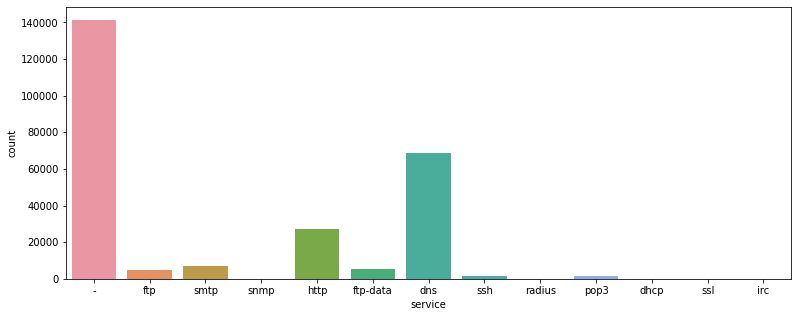

The class ratio for the original data: 4.0:1 (4/1)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


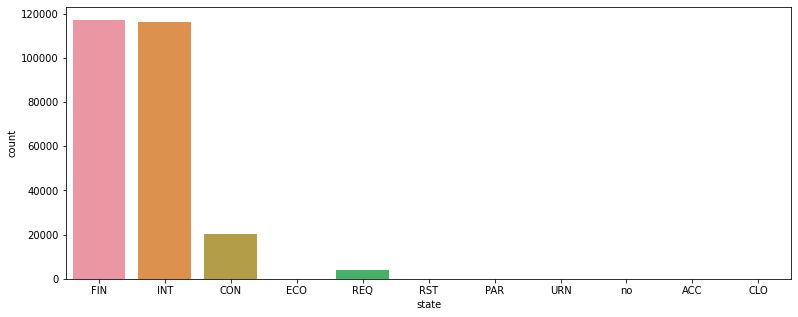

The class ratio for the original data: 1.1:1 (2677/2329)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


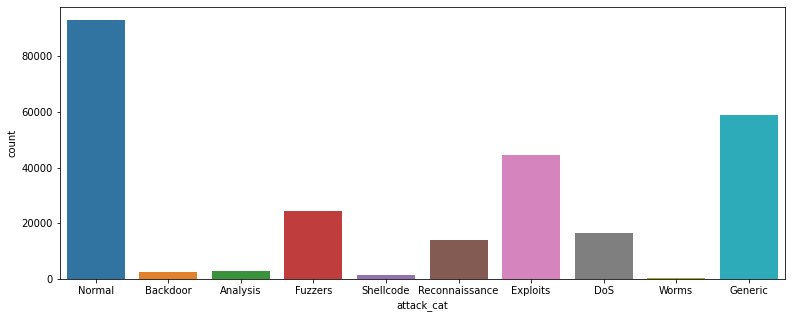

The class ratio for the original data: 0.5:1 (82332/175341)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


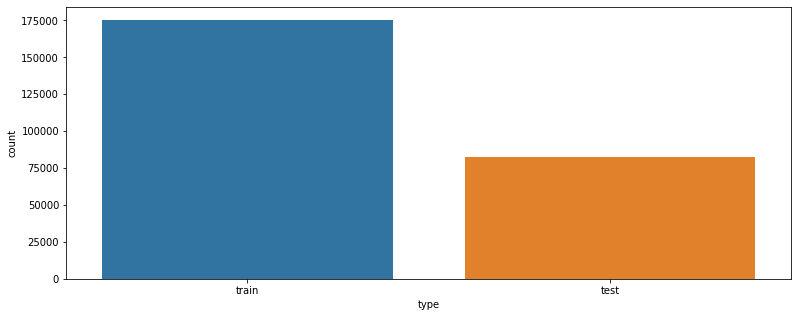

In [21]:
for i in cols_cat:
    if i == 'proto':
        print(i, '\n', data[i].value_counts().to_dict())
    else :
        print('The class ratio for the original data:', data_ratio(data[i]))
        plt.figure(figsize=(13,5))
        sns.countplot(data[i],label="Sum")
        plt.show()

### Checking what all features mean

In [22]:
features = pd.read_csv('./botnet/UNSW-NB15_features.csv')
features.head(features.shape[0])

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [23]:
normal = data[data['label']==0]
anomaly = data[data['label']==1]

Some difference with features file

In [24]:
print(sorted(set(train.columns) - set(features['Name'].values)))
print(sorted(set(features['Name'].values) - set(train.columns)))

['ct_src_ltm', 'dinpkt', 'djit', 'dload', 'dmean', 'dpkts', 'id', 'label', 'rate', 'response_body_len', 'sinpkt', 'sjit', 'sload', 'smean', 'spkts', 'type']
['Dintpkt', 'Djit', 'Dload', 'Dpkts', 'Label', 'Ltime', 'Sintpkt', 'Sjit', 'Sload', 'Spkts', 'Stime', 'ct_src_ ltm', 'dmeansz', 'dsport', 'dstip', 'res_bdy_len', 'smeansz', 'sport', 'srcip']


Some of the column names in features file are wrong and we are going to fix them.

In [25]:
fix = {'Dintpkt': 'dinpkt', 'Djit':'djit',  'Dload':'dload', 'Dpkts':'dpkts', 'Label':'label', 'Sintpkt': 'sinpkt','Sload':'sload','Spkts':'spkts',
'ct_src_ ltm': 'ct_src_ltm', 'dmeansz': 'dmean', 'res_bdy_len': 'response_body_len',  'smeansz': 'smean','Sjit':'sjit'}
features['Name'] = features['Name'].apply(lambda x: fix[x] if x in fix else x)
features.to_csv('./botnet/features.csv')

### Correlation Matrix

In [28]:
def show_correlation(data, method):
    correlation_matrix = data.corr(method=method) 
    fig = plt.figure(figsize=(20,12))
    sns.heatmap(correlation_matrix,vmax=0.8,square = True) 
    plt.show()
    return correlation_matrix

def top_correlations(correlations, limit=0.9):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if correlations.iloc[i,j] >= limit:
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")

def print_correlations(correlations, col1=None, col2=None):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if (col1 == None or col1==columns[i]) and (col2 == None or col2==columns[j]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            elif (col1 == None or col1==columns[j]) and (col2 == None or col2==columns[i]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            
def find_corr(df1, df2):
    return pd.concat([df1, df2], axis=1).corr().iloc[0,1]

def corr(col1, col2='label', df=data):
    return pd.concat([df[col1], df[col2]], axis=1).corr().iloc[0,1]

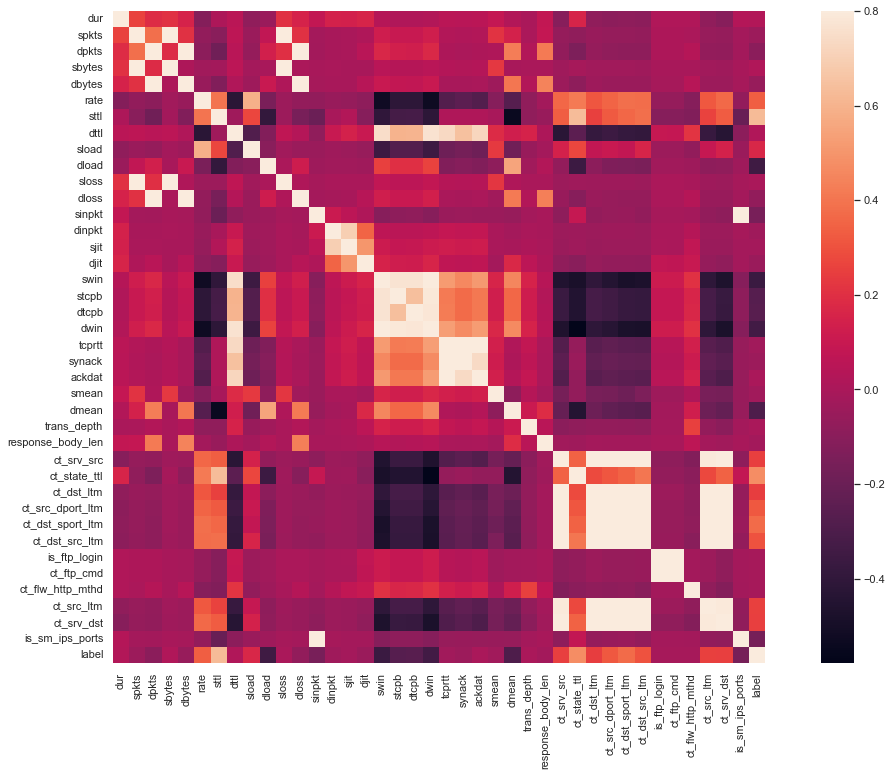

In [29]:
correlation_matrix = show_correlation(data,'pearson')



In [30]:
top_correlations(correlation_matrix, limit=0.9)

spkts sbytes 0.964393217155871
spkts sloss 0.9718594116510776
dpkts dbytes 0.9734453279792796
dpkts dloss 0.979612084935938
sbytes sloss 0.9957715772406667
dbytes dloss 0.996711133831455
sinpkt is_sm_ips_ports 0.9421206232319264
swin dwin 0.9804584289136496
tcprtt synack 0.9430527539834922
tcprtt ackdat 0.9202175911910121
ct_srv_src ct_dst_src_ltm 0.9539519771685965
ct_srv_src ct_srv_dst 0.9794668130725528
ct_dst_ltm ct_src_dport_ltm 0.9615176986568883
ct_dst_ltm ct_src_ltm 0.9015817705704372
ct_src_dport_ltm ct_dst_sport_ltm 0.9083371617418114
ct_src_dport_ltm ct_src_ltm 0.9094302805367733
ct_dst_src_ltm ct_srv_dst 0.9603212131064117
is_ftp_login ct_ftp_cmd 0.9988554882935726


Most correlated features are :
<ul>
<li>spkts, sbytes, sloss </li>
<li>dpkts, dbytes, dloss </li>
<li>sinpkt, is_sm_ips_ports </li>
<li>swin, dwin </li>
<li>tcprtt, synack </li>
<li>ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm </li>
<li>is_ftp_login ct_ftp_cmd </li>
</ul>

In [31]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    if method != None:
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()
    
def catplot(data, col):
    ax = sns.catplot(x=col, hue="label", col="type", data=data, kind="count", height=5, legend=False, aspect=1.4)
    ax.set_titles("{col_name}")
    ax.add_legend(loc='upper right',labels=['normal','attack'])
    plt.show(ax)

def create_count_df(col, data=data):
    df = pd.DataFrame(data[col].value_counts().reset_index().values, columns = [col, 'count'])
    df['percent'] = df['count'].values*100/data.shape[0]
    return df.sort_values(by='percent', ascending=False)

### Categorical

These four columns are categorical: 'attack_cat', 'state', 'service', 'proto'. Among them 'attack_cat' isn't a feature. These features are categorical but in integer form : 'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login'.

#### label

0 for normal and 1 for attack records

In [32]:
create_count_df('label', train)

,label,count,percent
0,1,119341,68.062233
1,0,56000,31.937767


In [33]:
create_count_df('label', test)

,label,count,percent
0,1,45332,55.060001
1,0,37000,44.939999


it seems the dataset is pretty balanced, unlike real world data where attack scenarios are rare

#### state

Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)

In [34]:
col = 'state'
create_count_df(col, train)

,state,count,percent
0,INT,82275,46.922853
1,FIN,77825,44.384941
2,CON,13152,7.500813
3,REQ,1991,1.135502
4,RST,83,0.047336
5,ECO,12,0.006844
6,PAR,1,0.00057
7,URN,1,0.00057
8,no,1,0.00057


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


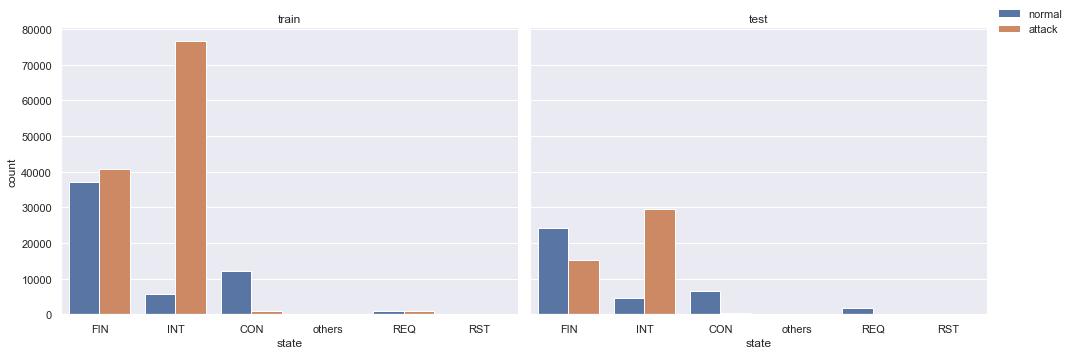

In [35]:
# all other values those were few in train set, have been renamed to 'others'
data.loc[~data[col].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), col] = 'others'
catplot(data, col)

#### service

http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service. More than half of the service data are of - category.

In [36]:
col = 'service'
create_count_df(col, train)

,service,count,percent
0,-,94168,53.705636
1,dns,47294,26.972585
2,http,18724,10.678621
3,smtp,5058,2.884665
4,ftp-data,3995,2.278417
5,ftp,3428,1.955048
6,ssh,1302,0.742553
7,pop3,1105,0.630201
8,dhcp,94,0.05361
9,snmp,80,0.045625


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


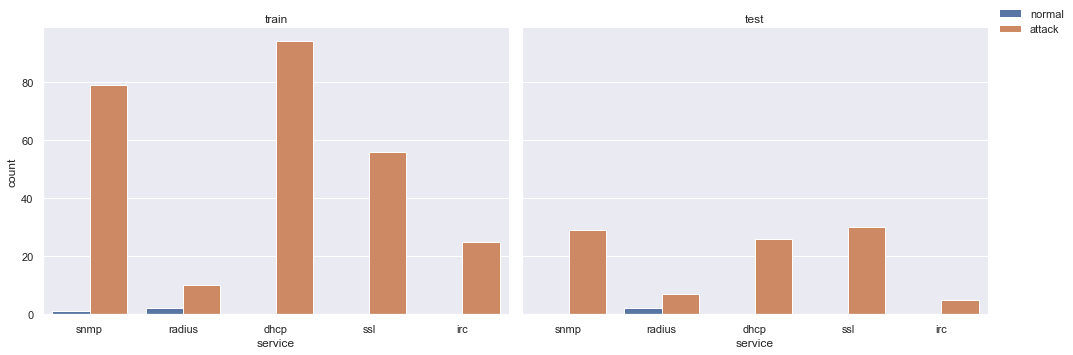

In [37]:
catplot(data[~data[col].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3'])], col)

#### proto

Transaction protocol. Normal connections of train data have only 5 protocols, where anomaly connections have 129. So we'll convert all other protocols into same value.

In [38]:
col = 'proto'
create_count_df(col, normal)

,proto,count,percent
0,tcp,66969,72.009677
1,udp,22019,23.676344
2,arp,3846,4.135484
3,ospf,102,0.109677
4,igmp,48,0.051613
5,icmp,15,0.016129
6,rtp,1,0.001075


In [39]:
create_count_df(col, anomaly)[:15]

,proto,count,percent
0,udp,70682,42.922641
1,tcp,56072,34.050512
2,unas,15599,9.472713
3,ospf,3169,1.92442
4,sctp,1474,0.895107
5,any,396,0.240477
6,gre,313,0.190074
7,rsvp,264,0.160318
8,ipv6,262,0.159103
9,sun-nd,255,0.154852


In [40]:
# icmp and rtp columns are in test, but not in train data
data.loc[data[col].isin(['igmp', 'icmp', 'rtp']), col] = 'igmp_icmp_rtp'
data.loc[~data[col].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), col] = 'others'

#### is_sm_ips_ports


If source and destination IP addresses equal and port numbers (sport/dport) equal then, this variable takes value 1 else 0. Seems if it is 1, then the connection is always normal. This feature is highly correlated with sinpkt (0.94131890073567).

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


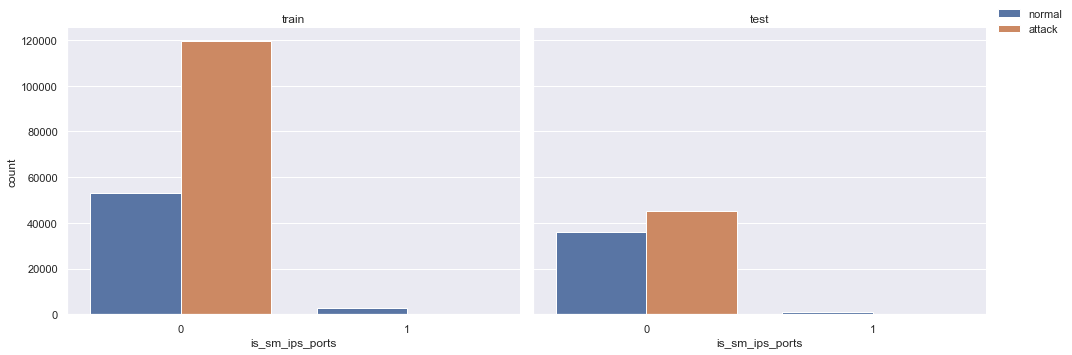

In [41]:
catplot(data, 'is_sm_ips_ports')

#### is_ftp_login

If the ftp session is accessed by user and password then 1 else 0. In most of the cases session has no user and password. However there are values 2 and 4 which should not be there.

This feature is totally correlated with ct_ftp_cmd, which counts the number of ftp commands. So dropping this column should be ok.

0.9988554882935726 -0.008761579815051115


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


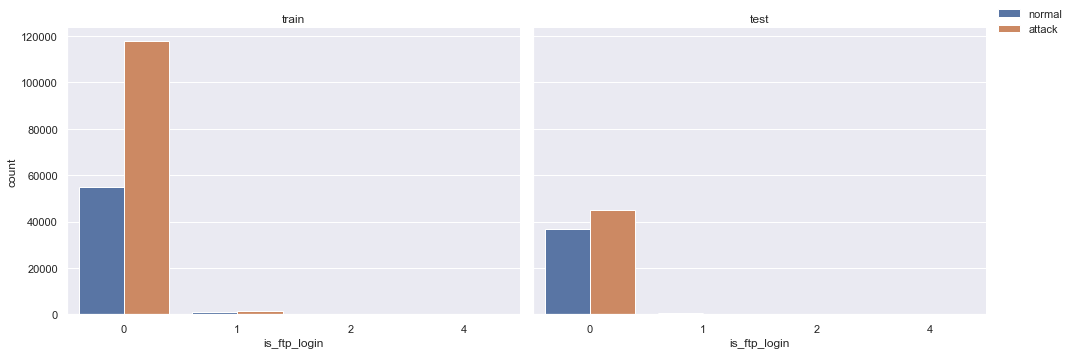

In [42]:
col = 'is_ftp_login'
print(corr('ct_ftp_cmd', col), corr('is_ftp_login', 'label'))
catplot(data, col)
data.drop([col], axis=1, inplace=True)

### Numerical 

#### ct_state_ttl

No. for each state according to specific range of values for source/destination time to live (sttl/dttl).

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


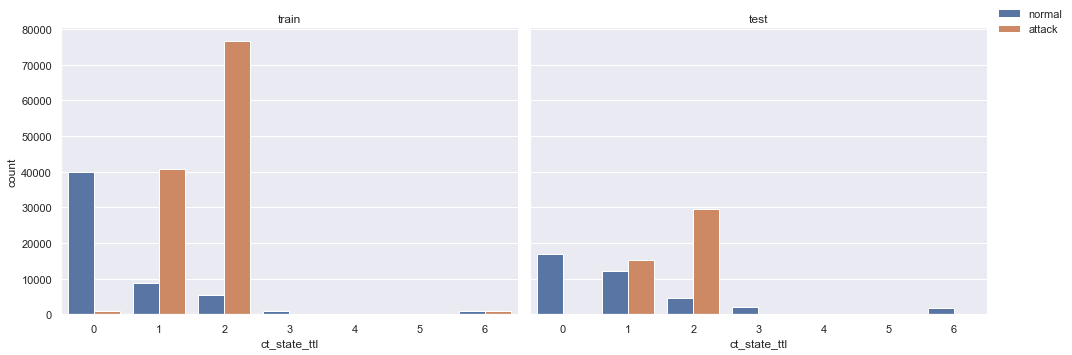

In [43]:
col = 'ct_state_ttl'
catplot(data, col)

### ct_ftp_cmd

No of flows that has a command in ftp session. It has a very low correlation with target. Also is_ftp_login is highly correlated with it (0.9988554882922012).

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


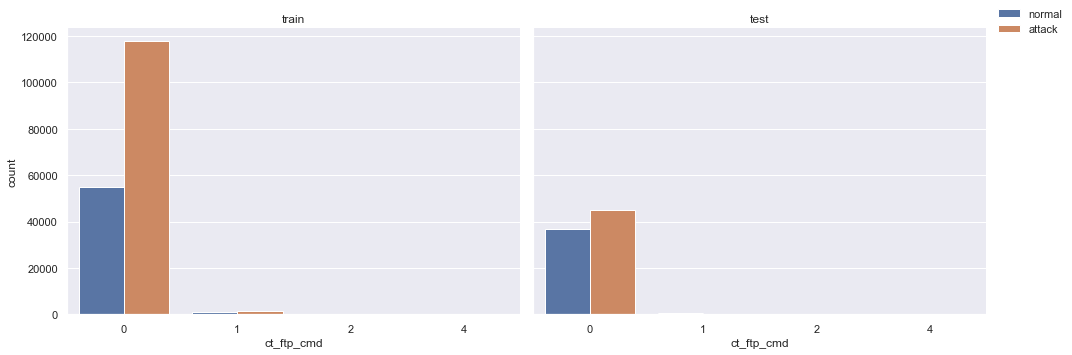

-0.009091577232666164

In [44]:
catplot(data, 'ct_ftp_cmd')
corr('ct_ftp_cmd', 'label')

#### ct_flw_http_mthd

No. of flows that has methods such as Get and Post in http service. Seems 0 has more anomaly values, however the correlation is very small with target.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


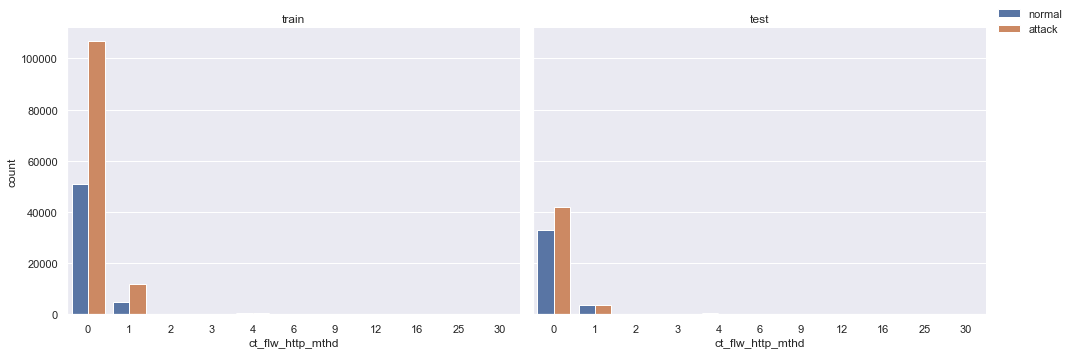

-0.012237160723342796

In [45]:
col = 'ct_flw_http_mthd'
catplot(data, col)
corr(col)

In [46]:
create_count_df(col, data)

,ct_flw_http_mthd,count,percent
0,0,232253,90.134783
1,1,23604,9.160448
2,4,1324,0.513830
3,9,216,0.083827
4,2,92,0.035704
5,16,48,0.018628
6,6,42,0.016300
7,12,36,0.013971
8,30,30,0.011643
9,25,25,0.009702


#### sbytes & dbytes

<ul>
<li>sbytes: Source to destination transaction bytes</li>
<li>dbytes: Destination to source transaction bytes</li>
</ul>

These 2 features are higly corelated to number of packets sent (spkts & dpkts). Actually, spkts * smean = sbytes. Also they are closely related to sloss and dloss. So we can drop these 2 here.

In [47]:
print(find_corr(data['spkts']*data['smean'], data['sbytes'])) 
print(find_corr(data['dpkts']*data['dmean'], data['dbytes'])) 
print(corr('sbytes', 'sloss'), corr('dbytes', 'dloss')) 
data.drop(['sbytes', 'dbytes'], axis=1, inplace=True)

0.9999999770938806
0.9999999748988752
0.9957715772406667 0.996711133831455


#### smean & dmean

Mean of the packet size transmitted. However is it just sbytes/spkts. The correlation says it is. So we already have this info from those other features.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

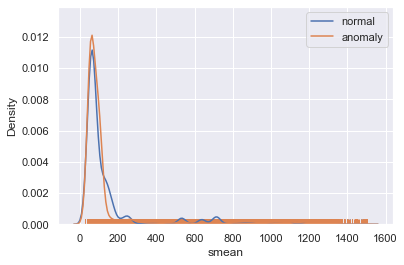

In [48]:
dual_plot('smean')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

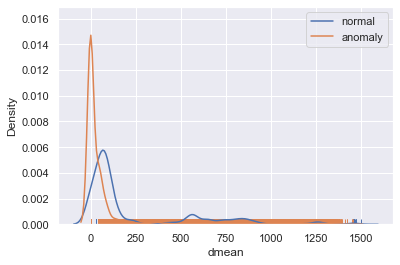

In [49]:
dual_plot('dmean')

In [50]:
data['smean_log1p'] = data['smean'].apply(np.log1p)
data['dmean_log1p'] = data['dmean'].apply(np.log1p)

# -0.02837244879012871 -0.2951728296856902 -0.05807468815031313 -0.5111549621216057
print(corr('smean'), corr('dmean'), corr('smean_log1p'), corr('dmean_log1p'))
# So we have better correlation with label after applying log1p. 

data.drop(['smean', 'dmean'], axis=1, inplace=True)

-0.028372448790220082 -0.2951728296861178 -0.05807468815042954 -0.5111549621212792


#### spkts and dpkts

<ul>
<li>spkts : Source to destination packet count</li>
<li>dpkts: Destination to source packet count</li>
</ul>

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

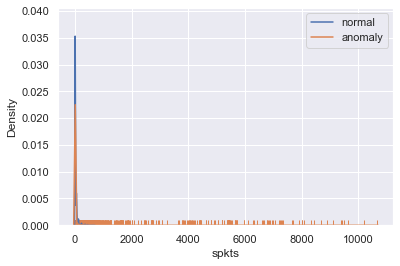

In [51]:
col = 'spkts'
dual_plot(col)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

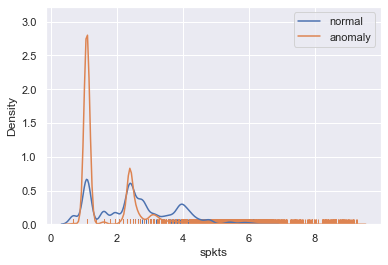

In [52]:
dual_plot(col, method=np.log1p)

In [53]:
data['spkts_log1p'] = data['spkts'].apply(np.log1p)
data['dpkts_log1p'] = data['dpkts'].apply(np.log1p)
# -0.043040466783819634 -0.09739388286233619 -0.3468819761209388 -0.45005074723539357
print(corr('spkts'), corr('dpkts'), corr('spkts_log1p'), corr('dpkts_log1p'))
# So we have better correlation with label after applying log1p. 

data.drop(['spkts', 'dpkts'], axis=1, inplace=True)

-0.043040466783984016 -0.09739388286254294 -0.34688197640434154 -0.45005074818051816


#### sttl & dttl
<ul>
<li>sttl: Source to destination time to live value</li>
<li>dttl: Destination to source time to live value</li>
</ul>

For sttl most of the anomalies have live values around 65 and 250. Its correlation with the target value is high too. However, for dttl both types have nearly same distribution. So the correlation with target is very low.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

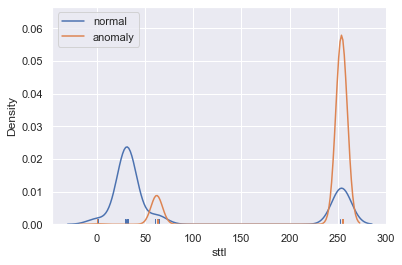

In [54]:
col = 'sttl'
dual_plot(col) # 0.62408238, after applying log1p 0.61556952425

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

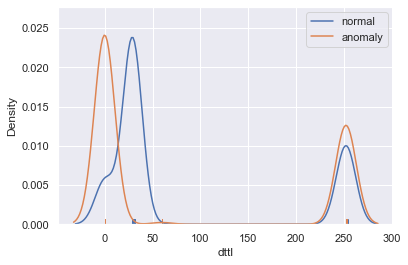

In [55]:
col = 'dttl'
dual_plot(col) # corr -0.09859087338578788

#### sloss & dloss

<ul>
<li>sloss: Source packets retransmitted or dropped</li>
<li>dloss: Destination packets retransmitted or dropped</li>
</ul>

Sloss is highly correlated with spkts and sbytes (more than .91). Similarly dloss is highly correlated with dpkts and dbytes. However, though packets sent is related to loss of packets, this isn't quite linearly related like packet number and size. So we keep both for now.

Values are mostly between 0 to 3. Yet some values are more than several thousands.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

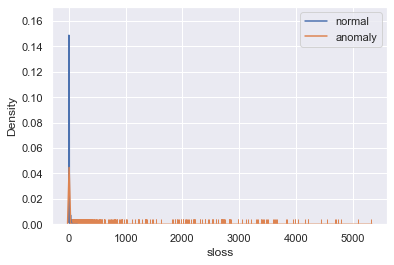

In [56]:
dual_plot('sloss')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

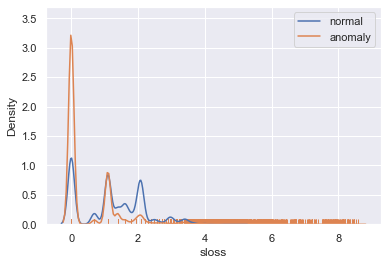

In [57]:
# So log1p makes it easier to differentiate
dual_plot('sloss', method=np.log1p)

In [58]:
data['sloss_log1p'] = data['sloss'].apply(np.log1p)
data['dloss_log1p'] = data['dloss'].apply(np.log1p)

# 0.001828274080103508 -0.07596097807462938 -0.3454351103223904 -0.3701913238787703
print(corr('sloss'), corr('dloss'), corr('sloss_log1p'), corr('dloss_log1p') )

data.drop(['sloss', 'dloss'], axis=1, inplace= True)

0.0018282740800910813 -0.07596097807474796 -0.34543511080081407 -0.3701913237990646


#### swin & dwin

TCP window advertisement value. Except 0 and 255 other values(1-254) occur mostly once only. So we can separate them into 3 groups. And we also see after binning their correlation with target remains same.

In [59]:
data['swin'].value_counts().loc[lambda x: x>1]

0      134632
255    123021
Name: swin, dtype: int64

In [60]:
data['dwin'].value_counts().loc[lambda x: x>1]

0      137157
255    120498
27          2
Name: dwin, dtype: int64

-0.36487721423357067 -0.3391656759097319


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

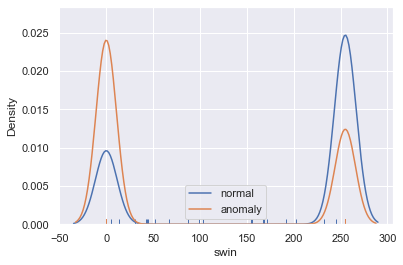

In [61]:
print(corr('swin'), corr('dwin'))

dual_plot('swin')

In [62]:
from sklearn import preprocessing
selected = ['swin', 'dwin']
kbins = preprocessing.KBinsDiscretizer(n_bins=[3, 3], encode='ordinal', strategy='uniform')
data[selected] = pd.DataFrame(kbins.fit_transform(data[selected]), columns=selected)
print(corr('swin'), corr('dwin'))

-0.3648685344300409 -0.3391433623547455


#### stcpb & dtcpb

TCP base sequence number. It has a really big range, 0 to 5e9. However, anomaly connections are mostly around 0.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

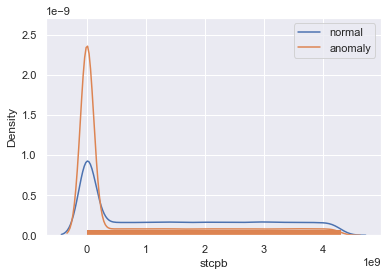

In [63]:
col = 'stcpb'
dual_plot(col)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

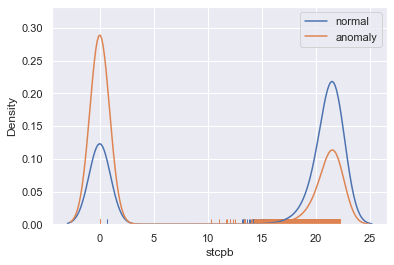

In [64]:
dual_plot(col, method=np.log1p)

In [65]:
data['stcpb_log1p'] = data['stcpb'].apply(np.log1p)
data['dtcpb_log1p'] = data['dtcpb'].apply(np.log1p)
# -0.2665849100492664 -0.2635428109654134 -0.33898970769021913 -0.33835676091281974
print(corr('stcpb'), corr('dtcpb'), corr('stcpb_log1p'), corr('dtcpb_log1p'))

data.drop(['stcpb', 'dtcpb'], axis=1, inplace= True)

-0.2665849100503958 -0.2635428109657902 -0.33898970768842174 -0.3383567609118355


### tcprtt & synack & ackdat

tcprtt is the TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.

synack: TCP connection setup time, the time between the SYN and the SYN_ACK packets.

ackdat : TCP connection setup time, the time between the SYN_ACK and the ACK packets.

As tcprtt, is just the sum of other two features, it doesn't add any extra info to our models. So we can just drop it for now. Applying preprocessing on synack and ackdat didn't improve much. From graph we can see, anomaly connections generally have values around 0.

In [66]:
data.drop(['tcprtt'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

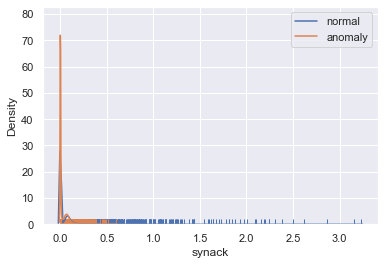

In [67]:
dual_plot('synack')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

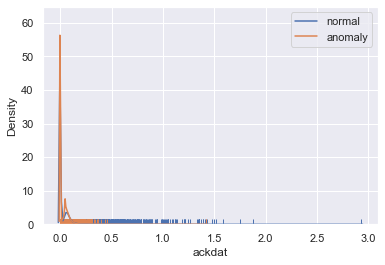

In [68]:
dual_plot('ackdat')

#### trans_depth

Represents the pipelined depth into the connection of http request/response transaction. After depth 39 occurences are few.

In [69]:
col = 'trans_depth'
print(corr(col)) # -0.0022256544
create_count_df(col, data)

0.0022459775335158644


,trans_depth,count,percent
0,0,232251,90.134007
1,1,25295,9.816706
2,2,108,0.041914
3,3,4,0.001552
4,4,4,0.001552
5,5,2,0.000776
6,39,2,0.000776
7,80,1,0.000388
8,155,1,0.000388
9,163,1,0.000388


#### response_body_len

Actual uncompressed content size of the data transferred from the server’s http service. The values range between 0 to 5.24M

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

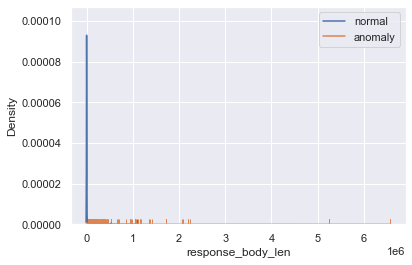

In [70]:
col = 'response_body_len'
dual_plot(col)

In [71]:
data["response_body_len_log1p"] = data["response_body_len"].apply(np.log1p)
# slight improve
# -0.018930127454048158 -0.03261972203078345
print(corr('response_body_len'), corr('response_body_len_log1p'))

data.drop(['response_body_len'], axis=1, inplace=True)

-0.018930127454113755 -0.07651272487784853


#### ct_srv_src

No. of connections that contain the same service and source address in 100 connections according to the last time. Most of the normal connections are within 10. It is highly correlated to ct_srv_dst.

In [72]:
col = 'ct_srv_src'
print(data[col].value_counts())

1     49876
2     29616
3     24482
4     19895
5     16280
6     14562
7     11708
8      8092
9      6848
10     6341
33     4604
12     4331
11     4325
16     3549
14     3478
17     3011
13     2877
34     2788
26     2328
18     2328
29     2290
32     2108
28     2107
15     2028
27     1961
30     1946
31     1920
23     1896
24     1814
25     1721
22     1662
21     1629
19     1623
20     1344
37     1237
35     1136
36     1116
43     1012
39      895
38      795
40      695
45      523
42      488
44      485
41      416
46      320
51      279
47      227
50      156
49      154
52      111
48       89
63       63
59       30
54       27
53       26
58       25
Name: ct_srv_src, dtype: int64


0.2465961676784894


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

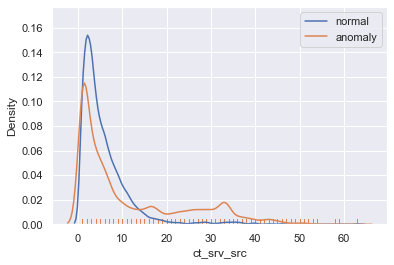

In [73]:
print(corr(col)) 
dual_plot(col)

#### ct_srv_dst

No. of connections that contain the same service and destination address in 100 connections according to the last time. It is highly correlated to ct_srv_src too. It has a slight better correlation with label than ct_srv_src. So the other one can be dropped to check for possible improvement.

1     58824
2     28745
3     24142
4     18809
5     15992
6     13406
7     10672
8      7311
9      6034
10     5878
33     4568
12     4138
11     4025
16     3580
14     3384
17     2977
34     2785
13     2508
18     2455
26     2310
29     2206
32     2124
28     2053
30     2002
27     1990
31     1949
25     1828
24     1770
23     1760
22     1549
15     1524
21     1479
20     1359
19     1304
37     1237
35     1206
36     1081
43      957
39      940
38      775
40      655
42      518
45      493
44      464
41      416
51      330
46      320
47      214
50      156
48      137
49      105
62       62
52       59
59       30
54       27
53       26
58       25
Name: ct_srv_dst, dtype: int64


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

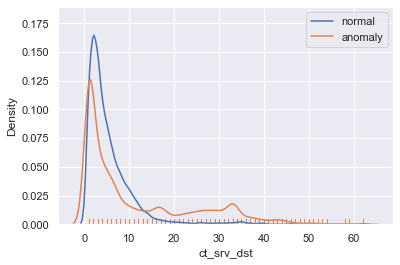

In [74]:
col = 'ct_srv_dst'
print(data[col].value_counts())
# graph is same as ct_srv_src
dual_plot(col)

In [75]:
# they are very correlated
print(corr('ct_srv_dst'), corr('ct_srv_src', 'ct_srv_dst'))

0.2478122357177674 0.9794668130725528


#### ct_src_ltm & ct_dst_ltm

No. of connections of the same source/destination address in 100 connections according to the last recorder time. Values are well between 0 to 51 and very few values after 48. They are much correlated , but not to the point of dropping one

In [76]:
col = 'ct_src_ltm'
print(corr(col))
create_count_df(col, data)

0.2524981765825701


,ct_src_ltm,count,percent
0,1,63870,24.787230
1,2,48965,19.002767
2,3,29180,11.324431
3,4,18863,7.320519
4,5,12297,4.772328
5,6,8573,3.327085
6,17,7613,2.954520
7,16,6817,2.645601
8,7,6263,2.430600
9,8,5804,2.252467


In [77]:
print(corr('ct_dst_ltm'))
create_count_df('ct_dst_ltm', data)

0.2407764412161283


,ct_dst_ltm,count,percent
0,1,83627,32.454700
1,2,48640,18.876638
2,3,27434,10.646828
3,4,17313,6.718981
4,5,9441,3.663946
5,6,7473,2.900187
6,16,7112,2.760087
7,17,6796,2.637451
8,7,5927,2.300202
9,18,5663,2.197747


In [78]:
corr('ct_src_ltm', 'ct_dst_ltm')

0.9015817705704371

#### ct_src_dport_ltm & ct_dst_sport_ltm
<ul>
<li>ct_src_dport_ltm : No of connections of the same source address and the destination port in 100 connections according to the last time.</li>
<li>ct_dst_sport_ltm: No of connections of the same destination address and the source port in 100 connections according to the last time.</li>
</ul>

In [79]:
for col in ['ct_src_dport_ltm', 'ct_dst_sport_ltm']:
    print(corr(col))
    print(create_count_df(col, data))

0.31851841978708895
    ct_src_dport_ltm   count    percent
0                  1  135974  52.769984
1                  2   36610  14.207930
2                  3   14495   5.625347
3                 16    8927   3.464469
4                  4    8651   3.357356
5                 17    6631   2.573417
6                  6    4306   1.671110
7                 18    4176   1.620659
8                  7    3448   1.338130
9                  5    2979   1.156116
10                33    2711   1.052109
11                14    2329   0.903859
12                 8    2196   0.852243
13                25    2085   0.809165
14                10    2042   0.792477
15                12    1812   0.703217
16                13    1802   0.699336
17                11    1697   0.658587
18                 9    1641   0.636854
19                15    1615   0.626763
20                34    1410   0.547205
21                43     952   0.369461
22                32     841   0.326383
23                20

In [80]:
corr('ct_src_dport_ltm', 'ct_dst_sport_ltm')

0.9083371617418114

#### dur

Recorded total duration, normal connections are mostly within 5. However, this feature has a poor correlation with label.

0.029096116996272136


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

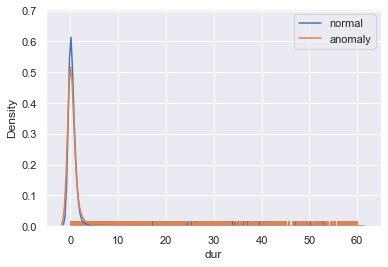

In [81]:
col = 'dur'
print(corr(col)) 
dual_plot(col)

#### rate

This feature isn't mentioned in feature list. It has value upto 1M. Anomaly connections are mostly around 0.

0.33588263882766156


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

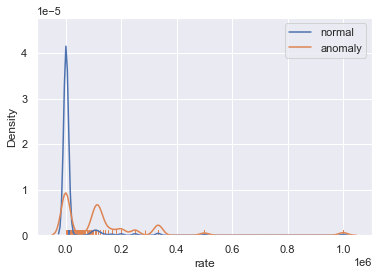

In [82]:
col = 'rate'
print(corr(col))
dual_plot(col)

#### sinpkt & dinpkt
<li>sinpkt: Source interpacket arrival time (mSec)</li>
<li>dinpkt: Destination interpacket arrival time (mSec)</li>

sinpkt is highly correlated with is_sm_ips_ports (0.9421206)

In [83]:
col = 'sinpkt'
corr(col, 'is_sm_ips_ports')

0.9421206232319264

-0.15545369808650886


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

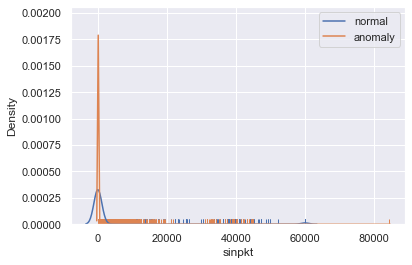

In [84]:
print(corr(col))
dual_plot(col)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

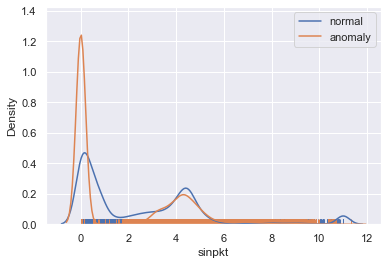

In [85]:
dual_plot(col, method=np.log1p)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

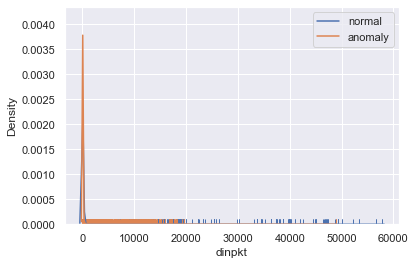

In [86]:
dual_plot('dinpkt')

In [87]:
data['sinpkt_log1p'] = data['sinpkt'].apply(np.log1p)
data['dinpkt_log1p'] = data['dinpkt'].apply(np.log1p)

# slight improve in correlation
# -0.1554536980867726 -0.030136042428744566 -0.16119699304378052 -0.07408113676641241
print(corr('sinpkt'), corr('dinpkt'), corr('sinpkt_log1p'), corr('dinpkt_log1p'))
data.drop(['sinpkt', 'dinpkt'], axis=1, inplace= True)

-0.15545369808650886 -0.0301360424208335 -0.16119699299656565 -0.07408113669633967


#### sload & dload
<ul>
<li>sload: Source bits per second</li>
<li>dload: Destination bits per second</li>
</ul>

The values are really big and in bits.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

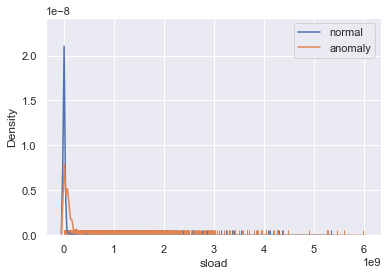

In [88]:
dual_plot('sload')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

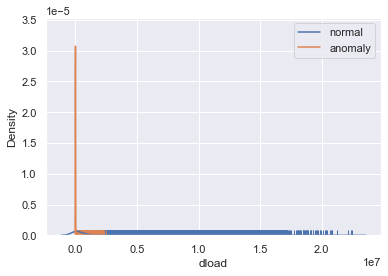

In [89]:
dual_plot('dload')

In [90]:
data['sload_log1p'] = data['sload'].apply(np.log1p)
data['dload_log1p'] = data['dload'].apply(np.log1p)
# 0.16524867685764016 -0.35216880416636837 0.3397788822586144 -0.5919440288535992
print(corr('sload'), corr('dload'), corr('sload_log1p'), corr('dload_log1p'))

data.drop(['sload', 'dload'], axis=1, inplace=True)

0.1652486768579289 -0.3521688041681107 0.33977888345151075 -0.5919440289118602


#### sjit & djit

Source and Destination jitter in mSec

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

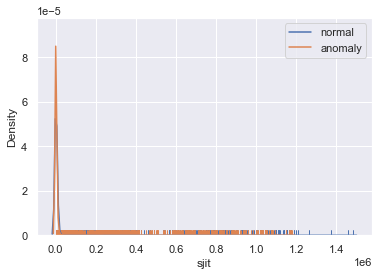

In [91]:
dual_plot('sjit')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

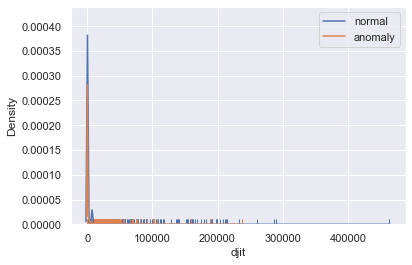

In [92]:
dual_plot('djit')

### Finally save the engineered data

In [93]:
train = data[data['type']=='train'].drop(['type'], axis=1)
test = data[data['type']!='train'].drop(['type'], axis=1)
train.to_csv('./botnet/train.csv', index=False)
test.to_csv('./botnet/test.csv', index=False)